# Borrower Reliability Study

## Project Description

The client is the credit department of a bank. The goal is to investigate whether the marital status and number of children of a client have an impact on the timely repayment of a loan. The input data from the bank consists of statistics on the creditworthiness of clients.

The research findings will be taken into account when building a credit scoring model, which is a specialized system that assesses the ability of a potential borrower to repay a loan to the bank.

### Data Description

`children` - number of children in the family

`days_employed` - total days of employment

`dob_years` - client's age in years

`education` - client's level of education

`education_id` - identifier for the level of education

`family_status` - marital status

`family_status_id` - identifier for the marital status

`gender` - client's gender

`income_type` - type of employment

`debt` - whether the client had a debt in loan repayment

`total_income` - monthly income

`purpose` - purpose of obtaining a loan

### Tasks

**Task 1.** Is there a correlation between the number of children and loan repayment on time?

**Task 2.** Is there a correlation between marital status and loan repayment on time?

**Task 3.** Is there a correlation between income level and loan repayment on time?

**Task 4.** How do different loan purposes affect timely repayment?

**Task 5.** Provide possible reasons for the presence of missing values in the original data.

**Task 6.** Explain why filling in missing values with the median is the best solution for quantitative variables.

## Data research

In [41]:
import pandas as pd
import seaborn as sn

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [42]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Conclusion:**
`The data contains missing values and outliers. Let's process them.`

## Data preprocessing

**Processing the gaps**

In [44]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [45]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [46]:
data['days_employed'] = data['days_employed'].abs()

**Processing abnormal values**

In [47]:
data['days_employed'] = data['days_employed'].abs()

In [48]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

In [49]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [50]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [51]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

**Processing the gaps ( continue)**

In [52]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [53]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Data type changing**

In [54]:
data['total_income'] = data['total_income'].astype(int)

**Processing duplicates**

In [55]:
data['education'] = data['education'].str.lower()

In [56]:
data.duplicated().sum()

71

In [57]:
data = data.drop_duplicates()

**Data categorisation**

In [58]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [59]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [60]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [61]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [62]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Data analysis

**Task 1.** Is there a correlation between the number of children and loan repayment on time?

[0.9245617770207935, 0.9076539101497504, 0.905458089668616, 0.9181818181818182, 0.9024390243902439, 1.0]
children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64
   children_numbers  ratio_list_children
0                 0             0.924562
1                 1             0.907654
2                 2             0.905458
3                 3             0.918182
4                 4             0.902439
5                 5             1.000000


<AxesSubplot:xlabel='ratio_list_children', ylabel='children_numbers'>

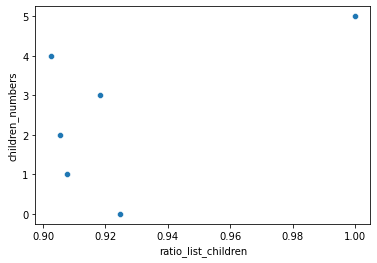

In [63]:
children_numbers = sorted(data['children'].unique()) #отсортируем уникальные значения количества детей по возрастанию
ratio_list_children = [] # создадим список с величинами, равными для каждого уникального значения количества детей соотношению количества людей, не имеющих задолженности по кредитам, к общему числу людей.
for number in children_numbers:
    ratio = data[(data['debt'] == 0)&(data['children'] == number)]['children'].count() / data[data['children'] == number]['children'].count()
    ratio_list_children.append(ratio)
print(ratio_list_children)

print(data.groupby(by='children')['children'].count()) #количество людей по категориям, вспомогательные данные

df=pd.DataFrame({'children_numbers':children_numbers, 'ratio_list_children':ratio_list_children}) #создадим датафрейм из двух списков выше
print(df)

sn.scatterplot(data=df, x='ratio_list_children', y='children_numbers') # построим точечную диаграмму для наглядности

**Task 2.** Is there a correlation between marital status and loan repayment on time?

[0.9243944213359432, 0.9068698597000484, 0.9337539432176656, 0.9293523969722456, 0.9023605150214592]
family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: family_status, dtype: int64
           family_status  ratio_list_family
0        женат / замужем           0.924394
1       гражданский брак           0.906870
2         вдовец / вдова           0.933754
3              в разводе           0.929352
4  Не женат / не замужем           0.902361


<AxesSubplot:xlabel='ratio_list_family', ylabel='family_status'>

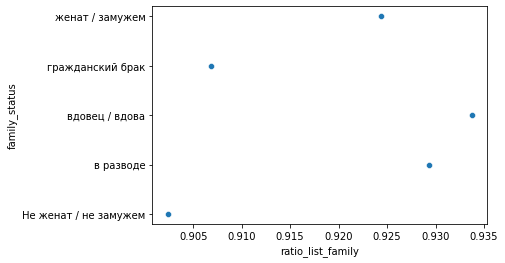

In [64]:
family_status = data['family_status'].unique() #отсортируем уникальные значения семейного положения

ratio_list_family = [] # создадим список с величинами, равными для каждого уникального значения семейного положения соотношению количества людей, не имеющих задолженности по кредитам, к общему числу людей.
for status in family_status:
    ratio = data[(data['debt'] == 0)&(data['family_status'] == status)]['family_status'].count() / data[data['family_status'] == status]['family_status'].count()
    ratio_list_family.append(ratio)
print(ratio_list_family)

print(data.groupby(by='family_status')['family_status'].count()) #количество людей по категориям, вспомогательные данные

df=pd.DataFrame({'family_status':family_status, 'ratio_list_family':ratio_list_family}) #создадим датафрейм из двух списков выше
print(df)

sn.scatterplot(data=df, x='ratio_list_family', y='family_status') # построим точечную диаграмму для наглядности

**Task 3.** Is there a correlation between income level and loan repayment on time?

[0.92, 0.929397686477862, 0.9150179008856227, 0.9398280802292264, 0.9090909090909091]
total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: total_income_category, dtype: int64
  total_income_category  ratio_list_category
0                     A             0.920000
1                     B             0.929398
2                     C             0.915018
3                     D             0.939828
4                     E             0.909091


<AxesSubplot:xlabel='ratio_list_category', ylabel='total_income_category'>

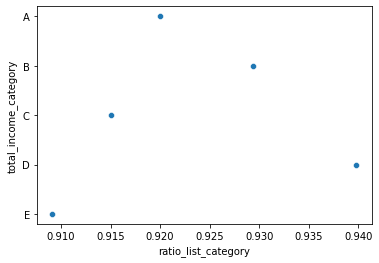

In [65]:
data['total_income_category'] = data['total_income'].apply(categorize_income)
total_income_category = sorted(data['total_income_category'].unique()) #отсортируем уникальные значения семейного положения

ratio_list_category = [] # создадим список с величинами, равными для каждого уникального значения семейного положения соотношению количества людей, не имеющих задолженности по кредитам, к общему числу людей.
for category in total_income_category:
    ratio = data[(data['debt'] == 0)&(data['total_income_category'] == category)]['total_income_category'].count() / data[data['total_income_category'] == category]['total_income_category'].count()
    ratio_list_category.append(ratio)
print(ratio_list_category)

print(data.groupby(by='total_income_category')['total_income_category'].count()) #количество людей по категориям, вспомогательные данные

df=pd.DataFrame({'total_income_category':total_income_category, 'ratio_list_category':ratio_list_category}) #создадим датафрейм из двух списков выше
print(df)

sn.scatterplot(data=df, x='ratio_list_category', y='total_income_category') # построим точечную диаграмму для наглядности

**Task 4.** How do different loan purposes affect timely repayment?

[0.9274486094316807, 0.9065202150035055, 0.9074724172517553, 0.920881971465629]
purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64
           purpose_category  ratio_list_purpose
0  операции с недвижимостью            0.927449
1    операции с автомобилем            0.906520
2     получение образования            0.907472
3        проведение свадьбы            0.920882


<AxesSubplot:xlabel='ratio_list_purpose', ylabel='purpose_category'>

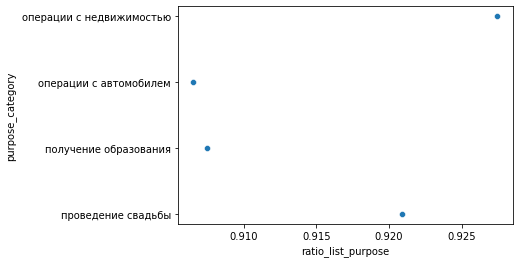

In [66]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
    
purpose_category = data['purpose_category'].unique()

ratio_list_purpose = [] # создадим список с величинами, равными для каждого уникального значения семейного положения соотношению количества людей, не имеющих задолженности по кредитам, к общему числу людей.
for purpose in purpose_category:
    ratio = data[(data['debt'] == 0)&(data['purpose_category'] == purpose)]['purpose_category'].count() / data[data['purpose_category'] == purpose]['purpose_category'].count()
    ratio_list_purpose.append(ratio)
print(ratio_list_purpose)

print(data.groupby(by='purpose_category')['purpose_category'].count()) #количество людей по категориям, вспомогательные данные

df=pd.DataFrame({'purpose_category':purpose_category, 'ratio_list_purpose':ratio_list_purpose}) #создадим датафрейм из двух списков выше
print(df)

sn.scatterplot(data=df, x='ratio_list_purpose', y='purpose_category') # построим точечную диаграмму для наглядности


**Conclusion:** `If we consider the available samples to be representative, we can say that people are more likely to have no debt on loans taken for real estate operations and weddings (92.7% and 92.1% respectively) compared to loans taken for education or car operations (90.7% and 90.65%).`

**Task 5.** Provide possible reasons for the presence of missing values in the original data.

**Answer:** `There are missing values in the columns total_income and days_employed. It is possible that the data is missing because banks sometimes grant loans without income and/or employment verification. Additionally, it is worth considering the human factor, as the data may have been intentionally or accidentally not entered.`

**Task 6.** Explain why filling in missing values with the median is the best solution for quantitative variables.

**Answer:** `The median provides a more accurate representation of the central value in a sample because it allows for the exclusion of outliers - values that are too large or too small.`

## Overall Conclusion

Number of children: People who have no children or three children are more likely to repay their loans on time (92.5% and 91.8% respectively have no debt) compared to those with two and four children (90.5% and 90.3% respectively). It is noteworthy that all individuals with five children (9 people) have no debt.

Marital status: Widows/widowers, individuals who are divorced, and those who are married are more likely to have no debt on their loans (93.4%, 92.9%, and 92.4% respectively) compared to those who are in a civil partnership (90.7%) or unmarried (90.2%).

Income level: Let's categorize individuals in the sample based on their income: E: from 0 to 30,000 D: from 30,001 to 50,000 C: from 50,001 to 200,000 B: from 200,001 to 1,000,000 A: 1,000,001 and above. People with income categories D and B are more likely to have no debt on their loans (94% and 92.9% respectively) compared to C (91.5%), A (92%), or E (90.9%).

Loan purposes: People who take loans for real estate operations and weddings are more likely to have no debt (92.7% and 92.1% respectively) compared to those for education or car operations (90.7% and 90.65%).